# Fasion-MNIST classification 

In this Assignment you are going to classify a fashion dataset.

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![](https://www.tensorflow.org/static/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png)


In [35]:
# Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren

# Initialization

load all needed libraries and functions, 
check the previos tutorial how to correctly load keras and other modules

### Import the needed libraries for this assignment. 

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

print("Current Tensorflow version used is: " + tf.__version__)

Current Tensorflow version used is: 2.11.0


### Functions created for this assignment

In [37]:
def plotSample(X, y , classes):
    plt.imshow(X, cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.xlabel(classes[y])
    plt.show()
    
def plotAccuracyVsEpoch(history):
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def plotLossVsEpoch(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    

### Check if a GPU is detected or if CPU must be used to train the TensorFlow model.

In [38]:
physical_devices = tf.config.list_physical_devices('GPU')

if (len(physical_devices) > 0):
    details = tf.config.experimental.get_device_details(physical_devices[0])
    print("GPU detected!")
    print("Num GPUs:", len(physical_devices))
    print("GPU Type:", details["device_name"])
    print("Compute Capability:", details["compute_capability"])
else:
    print("No physical devices")
    print("Using CPU to train the model.")

No physical devices
Using CPU to train the model.


### Create a variable to trigger training of the model or not.
This is done because the whole notebook can be run at once. If a model is trained already, it would be time consuming to create another model.

In [39]:
TrainModel = False

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

### Load the Fashion MNIST dataset and divide it into train and test datasets.

In [40]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Show the train and test shape of the dataset.

In [41]:
print("The shape of x_train is: " + str(x_train.shape))
print("The shape of y_train is: " + str(y_train.shape))
print("The shape of x_test is: " + str(x_test.shape))
print("The shape of y_test is: " + str(y_test.shape))

The shape of x_train is: (60000, 28, 28)
The shape of y_train is: (60000,)
The shape of x_test is: (10000, 28, 28)
The shape of y_test is: (10000,)


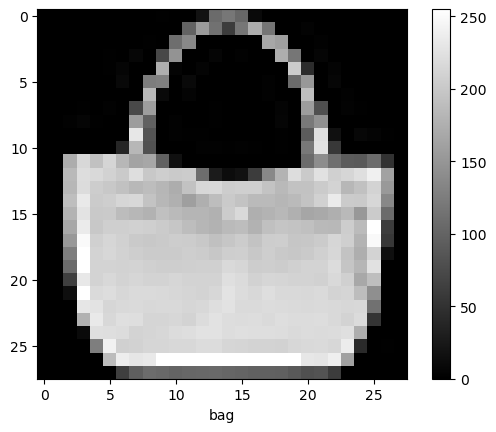

In [42]:
index = 100
plotSample(x_train[index], y_train[index], class_name)

# Prepare Data

pre-process your raw input data... rescale... normalize....

The pictures in the dataset are already in a 28x28 pixel format.
Also the data is in grayscale. If it would be RGB then the shape would be (60000, 28, 28, 3).

In the next steps, the x_train and x_test (Images) will be normalized by dividing them with 255.0.
This results in output data ranging from 0 to 1 instead of 0 to 255. Which is easier to train for the model.

In [43]:
x_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

In [44]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [45]:
x_train[100]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.07058824, 0.41960784, 0.46666667,
        0.40392157, 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38823529, 0.60784314, 0.44313725, 0.23921569,
        0.4627451 , 0.67843137, 0.45882353, 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.43137255, 0.53333333, 0.        , 0.        , 0.        ,
        0.        , 0.    

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. You can also monitor the Jetson CPU/GPU/Memory performance during this process (see Tips & Tricks)

* Explain what hyperparameters are available and what they do.
* Which hyperparameter result in better training results?

In [46]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [48]:
history = model.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.33)

Epoch 1/10
40199/40199 [==============================] - 43s 1ms/step - loss: 0.5236 - sparse_categorical_accuracy: 0.8098 - val_loss: 0.4413 - val_sparse_categorical_accuracy: 0.8411
Epoch 2/10
40199/40199 [==============================] - 41s 1ms/step - loss: 0.4209 - sparse_categorical_accuracy: 0.8505 - val_loss: 0.4005 - val_sparse_categorical_accuracy: 0.8543
Epoch 3/10
40199/40199 [==============================] - 40s 1ms/step - loss: 0.3903 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.8565
Epoch 4/10
40199/40199 [==============================] - 41s 1ms/step - loss: 0.3732 - sparse_categorical_accuracy: 0.8695 - val_loss: 0.4110 - val_sparse_categorical_accuracy: 0.8656
Epoch 5/10
40199/40199 [==============================] - 41s 1ms/step - loss: 0.3687 - sparse_categorical_accuracy: 0.8724 - val_loss: 0.4384 - val_sparse_categorical_accuracy: 0.8596
Epoch 6/10
40199/40199 [==============================] - 41s 1ms/step - lo

In [49]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

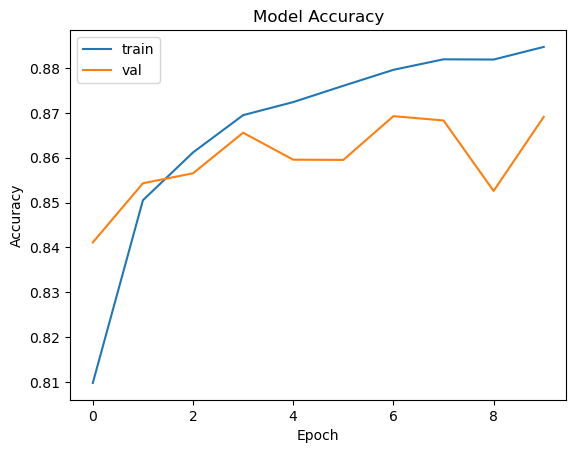

In [50]:
plotAccuracyVsEpoch(history)

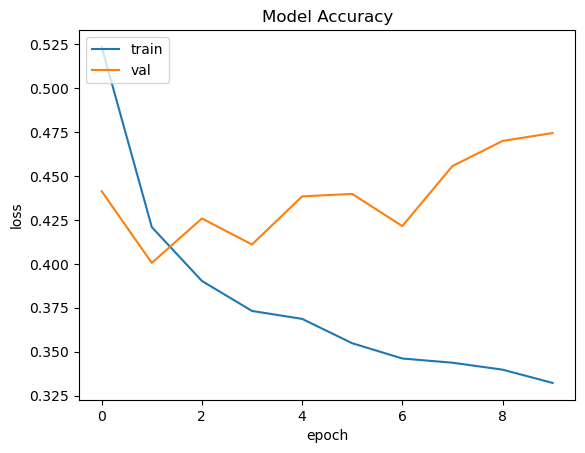

In [51]:
plotLossVsEpoch(history)

# Evaluate Model

Show the model accuracy after the training process ...
* What is the final accuracy of the trained Network?

# Save model

Save the model for later usage

# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

## Additional Questions
* In which way could the network accuracy be improved further (only explanation, no implementation)?